In [113]:
import math
import statistics
from collections import Counter

In [114]:
l = ['a','b','c','a','b','b']
c = Counter(l)
print(c)

Counter({'b': 3, 'a': 2, 'c': 1})


In [115]:
import matplotlib.pyplot as plt

In [116]:
def plot_classification(training_data, training_labels, test_point, test_label):
    # Zamiana etykiet na liczby dla uproszczenia (A -> 0, B -> 1)
    label_colors = {'A': 'blue', 'B': 'red'}

    # Rysowanie danych treningowych
    a_x, a_y, b_x, b_y = [], [], [], []
    for point, label in zip(training_data, training_labels):
        if label.upper() == "A":
            a_x.append(point[0])
            a_y.append(point[1])
        elif label.upper() == "B":
            b_x.append(point[0])
            b_y.append(point[1])
    plt.scatter(a_x, a_y, color='blue', label=f'Class A', s=100)
    plt.scatter(b_x, b_y, color='red', label=f'Class B', s=100)

    # Rysowanie punktu testowego z innym kształtem
    test_color = label_colors[test_label]
    plt.scatter(test_point[0], test_point[1], color=test_color, s=100, marker='D', label='Test point')

    plt.title("knn classification")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show()

In [117]:
def plot_regression(training_data, training_values, test_point, test_value):
    # Normalizacja wartości do zakresu [0, 1] dla cieniowania kolorów
    min_value = min(training_values)
    max_value = max(training_values)
    norm_values = [(val - min_value) / (max_value - min_value) for val in training_values]

    # Rysowanie danych treningowych
    scatter = plt.scatter(
        [point[0] for point in training_data],
        [point[1] for point in training_data],
        c=norm_values, cmap='cool', s=100
    )

    # Rysowanie punktu testowego z innym kształtem
    norm_test_value = (test_value - min_value) / (max_value - min_value)
    plt.scatter(test_point[0], test_point[1], color=plt.cm.cool(norm_test_value), s=100, marker='D', label='Test point')

    plt.colorbar(scatter, label='Values')
    plt.title("knn regression")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.legend()
    plt.show()

In [118]:
# Funkcja obliczająca odległość euklidesową
def euclidean_distance(point1, point2):
    return math.sqrt(sum((x - y) ** 2 for x, y in zip(point1, point2)))

In [119]:
# Points
training_data = [[3.41, 2.32], [2.78, 3.79], [3.49, 1.22], 
                       [1.76, 1.88], [1.92, 2.33], [2.12, 3.16], 
                       [7.61, 7.1], [7.36, 7.27], [8.2, 5.84], 
                       [7.25, 5.32], [5.96, 7.52], [7.69, 6.41]]

# Classification
training_labels = ['A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B']

# Regression
training_values = [1.39, 0.96, 1.97, 1.52, 0.32, 2.02, 5.4, 6.26, 5.72, 5.47, 6.27, 5.83]

# K
k = 3

In [120]:
def knn_classifier_predict(training_data, training_labels, test_point, k=3):
    # Oblicz odległość od każdego punktu treningowego
    distances = []
    for data_point, label in zip(training_data, training_labels):
        distance = euclidean_distance(test_point, data_point)
        distances.append((distance, label))
    
    # Posortuj punkty według odległości
    distances.sort(key=lambda x: x[0])
    
    # Wybierz k najbliższych sąsiadów
    k_nearest_neighbors = distances[:k]
    
    # Zlicz klasy sąsiadów (do klasyfikacji)
    k_nearest_labels = [label for _, label in k_nearest_neighbors]
    most_common_label = Counter(k_nearest_labels).most_common(1)[0][0]
    
    return most_common_label

Estimated class for the point [5, 5] is: B


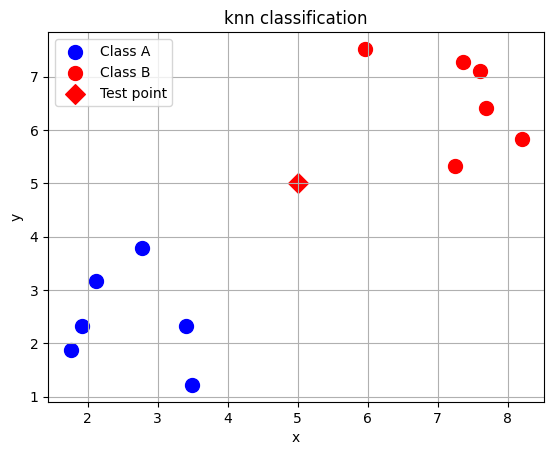

In [121]:
test_point = [5, 5]
predicted_label = knn_classifier_predict(training_data, training_labels, test_point, k)

print(f'Estimated class for the point {test_point} is: {predicted_label}')
plot_classification(training_data, training_labels, test_point, predicted_label)

In [122]:
def knn_regressor_predict(training_data, training_values, test_point, k=3):
    # Oblicz odległość od każdego punktu treningowego
    distances = []
    for data_point, value in zip(training_data, training_values):
        distance = euclidean_distance(test_point, data_point)
        distances.append((distance, value))
    
    # Posortuj punkty według odległości
    distances.sort(key=lambda x: x[0])
    
    # Wybierz k najbliższych sąsiadów
    k_nearest_neighbors = distances[:k]
    
    # Oblicz średnią wartość najbliższych sąsiadów
    k_nearest_values = [value for _, value in k_nearest_neighbors]
    predicted_value = statistics.mean(k_nearest_values)
    
    return predicted_value

Estimated value for point [5, 5] is: 4.233333333333333


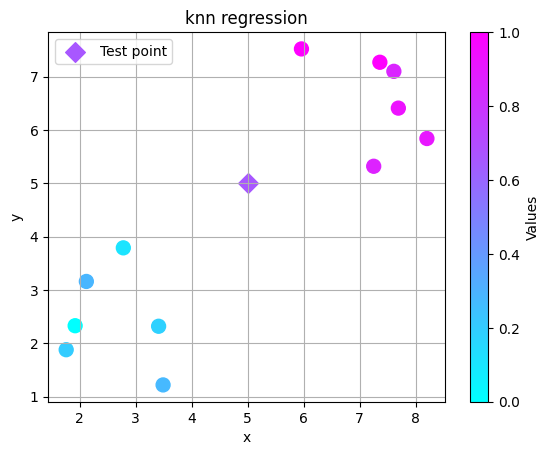

In [123]:
test_point = [5, 5]
predicted_value = knn_regressor_predict(training_data, training_values, test_point, k)
print(f'Estimated value for point {test_point} is: {predicted_value}')
plot_regression(training_data, training_values, test_point, predicted_value)

SKLearn:

In [124]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

Estimated class for the point [5, 5] is: B


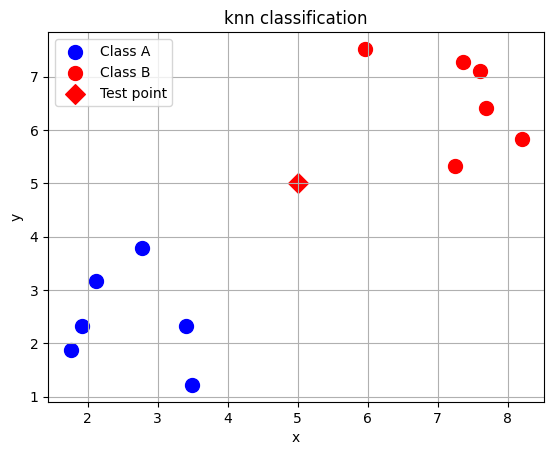

In [125]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(training_data, training_labels)

test_point = [5, 5]
predicted_label = knn.predict([test_point])

print(f'Estimated class for the point {test_point} is: {predicted_label[0]}')
plot_classification(training_data, training_labels, test_point, predicted_label[0])

Estimated value for the point [5, 5] is: 4.233333333333333


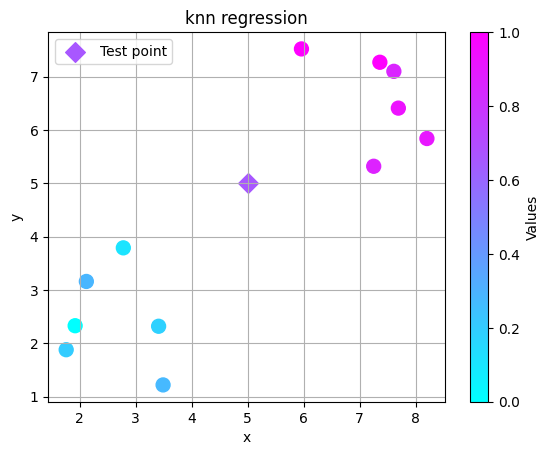

In [126]:
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(training_data, training_values)

test_point = [5, 5]
predicted_values = knn_regressor.predict([test_point])

print(f'Estimated value for the point {test_point} is: {predicted_values[0]}')
plot_regression(training_data, training_values, test_point, predicted_values[0])